In [380]:
%%capture
%pip install kmodes

%pip install seaborn
%pip install plotly

%pip install yellowbrick

In [381]:
# Data wrangling
import numpy as np
import pandas as pd
1
# Dataviz
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale

from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA


import string

In [382]:
df = pd.read_csv(r"c:\Users\Shiry\OneDrive\Área de Trabalho\Git Hub\projetos\Clusteriza--o-K-Means-e-PCA----Satisfa--o-de-pacientes\IGR.csv", delimiter=";", on_bad_lines="skip")


C:\Users\Shiry\AppData\Local\Temp\ipykernel_6372\690129339.py:1: DtypeWarning: Columns (9) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r"c:\Users\Shiry\OneDrive\Área de Trabalho\Git Hub\projetos\Clusteriza--o-K-Means-e-PCA----Satisfa--o-de-pacientes\IGR.csv", delimiter=";", on_bad_lines="skip")


In [383]:
df.head()

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,COMPETENCIA,COMPETENCIA_BENEFICIARIO,DT_ATUALIZACAO
0,27,MASSA FALIDA DE SALUTAR SAÚDE SEGURADORA S.A.,assistencia medica,0,0,2,Pequeno,202409,202408,07/10/2024
1,477,SUL AMERICANAA SEGURADORA DE SAUDE S.A,assistencia medica,"131,35",52,39589,Médio,202409,202408,07/10/2024
2,515,ALLIANZ SAÚDE S/A,assistencia medica,0,0,337,Pequeno,202409,202408,07/10/2024
3,582,PORTO SEGURO - SEGURO SAÚDE S/A,assistencia medica,"49,93",303,606829,Grande,202409,202408,07/10/2024
4,582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,"1,59",15,942240,Grande,202409,202408,07/10/2024


In [384]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 132559 entries, 0 to 132558
Data columns (total 10 columns):
 #   Column                    Non-Null Count   Dtype 
---  ------                    --------------   ----- 
 0   REGISTRO_ANS              132559 non-null  int64 
 1   RAZAO_SOCIAL              132559 non-null  object
 2   COBERTURA                 132559 non-null  object
 3   IGR                       132559 non-null  object
 4   QTD_RECLAMACOES           132559 non-null  int64 
 5   QTD_BENEFICIARIOS         132559 non-null  int64 
 6   PORTE_OPERADORA           132559 non-null  object
 7   COMPETENCIA               132559 non-null  int64 
 8   COMPETENCIA_BENEFICIARIO  132559 non-null  int64 
 9   DT_ATUALIZACAO            70440 non-null   object
dtypes: int64(5), object(5)
memory usage: 10.1+ MB


In [385]:
df.isnull().sum()

REGISTRO_ANS                    0
RAZAO_SOCIAL                    0
COBERTURA                       0
IGR                             0
QTD_RECLAMACOES                 0
QTD_BENEFICIARIOS               0
PORTE_OPERADORA                 0
COMPETENCIA                     0
COMPETENCIA_BENEFICIARIO        0
DT_ATUALIZACAO              62119
dtype: int64

In [386]:
df.duplicated().sum()

0

In [387]:
df = df.drop(columns=['DT_ATUALIZACAO'])

In [388]:
df['IGR'] =df['IGR'].str.replace(',','.').astype(float)



In [389]:
df_2 = df.copy()

In [390]:
# Filtra o DataFrame para manter apenas as linhas onde QTD_RECLAMACOES é igual a 0



In [391]:
df = df[df['PORTE_OPERADORA'] != 'Pequeno']

df = df[df['PORTE_OPERADORA'] != 'Médio']

df = df[df['QTD_RECLAMACOES'] != 0]

In [392]:
df.head()

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,COMPETENCIA,COMPETENCIA_BENEFICIARIO
3,582,PORTO SEGURO - SEGURO SAÚDE S/A,assistencia medica,49.93,303,606829,Grande,202409,202408
4,582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,1.59,15,942240,Grande,202409,202408
5,701,UNIMED SEGUROS SAÚDE S/A,assistencia medica,57.40,476,829322,Grande,202409,202408
7,5711,BRADESCO SAÚDE S.A.,assistencia medica,99.10,3099,3127234,Grande,202409,202408
8,6246,SUL AMERICA COMPANHIA DE SEGURO SAÚDE,assistencia medica,97.49,2124,2178663,Grande,202409,202408


In [393]:
df_3 = df.copy()

In [394]:
colunas_drop =['COBERTURA','PORTE_OPERADORA', 'RAZAO_SOCIAL','COMPETENCIA','COMPETENCIA_BENEFICIARIO','REGISTRO_ANS','IGR']

for col in colunas_drop:
    df=df.drop(columns=[col])

In [395]:
df.describe()

,QTD_RECLAMACOES,QTD_BENEFICIARIOS
count,11362.000000,1.136200e+04
mean,116.951065,5.567285e+05
std,357.249406,9.207376e+05
min,1.000000,1.000050e+05
25%,7.000000,1.461432e+05
50%,22.000000,2.324605e+05
75%,72.000000,5.023955e+05
max,5132.000000,7.977292e+06


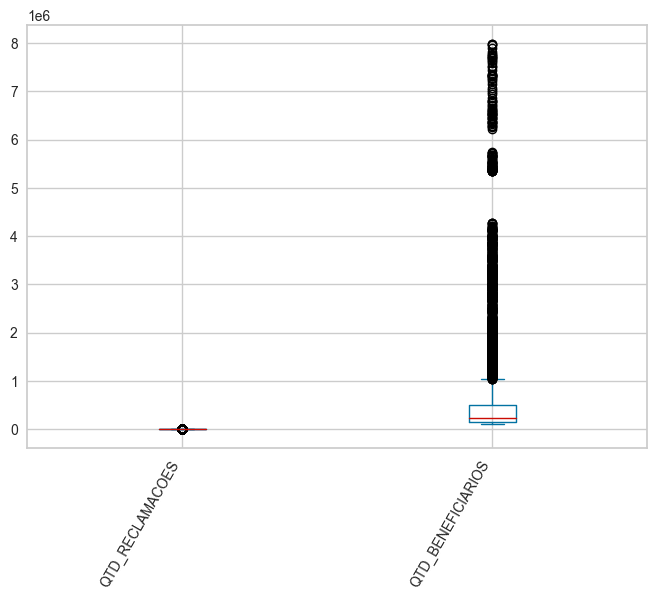

In [396]:
df.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()

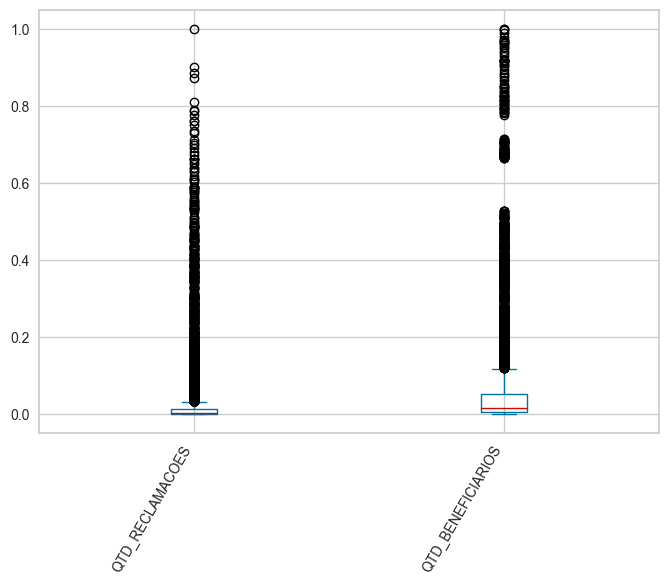

In [397]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd


scaler = MinMaxScaler()


df_scaled = scaler.fit_transform(df.values)


df_scaled = pd.DataFrame(df_scaled, columns=df.columns)


df_scaled.plot.box()
plt.xticks(rotation=60, ha='right')
plt.show()


In [398]:
df_scaled.describe()

,QTD_RECLAMACOES,QTD_BENEFICIARIOS
count,11362.000000,11362.000000
mean,0.022598,0.057980
std,0.069626,0.116885
min,0.000000,0.000000
25%,0.001169,0.005857
50%,0.004093,0.016815
75%,0.013837,0.051082
max,1.000000,1.000000


KElbowVisualizer(ax=<Axes: >, estimator=KMeans(n_clusters=10), k=(1, 11))

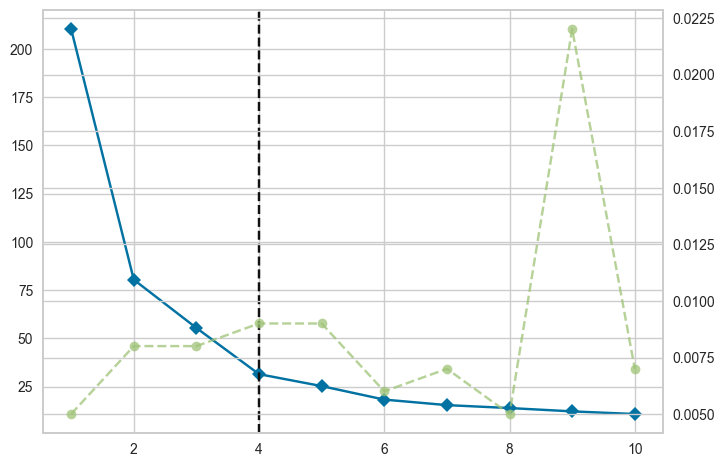

In [399]:
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,11))
visualizer.fit(df_scaled)            


In [400]:
modelo = KMeans(4,random_state=0).fit(df_scaled)

In [401]:

centroids = modelo.cluster_centers_
labels = modelo.labels_


df_scaled['Cluster'] = labels


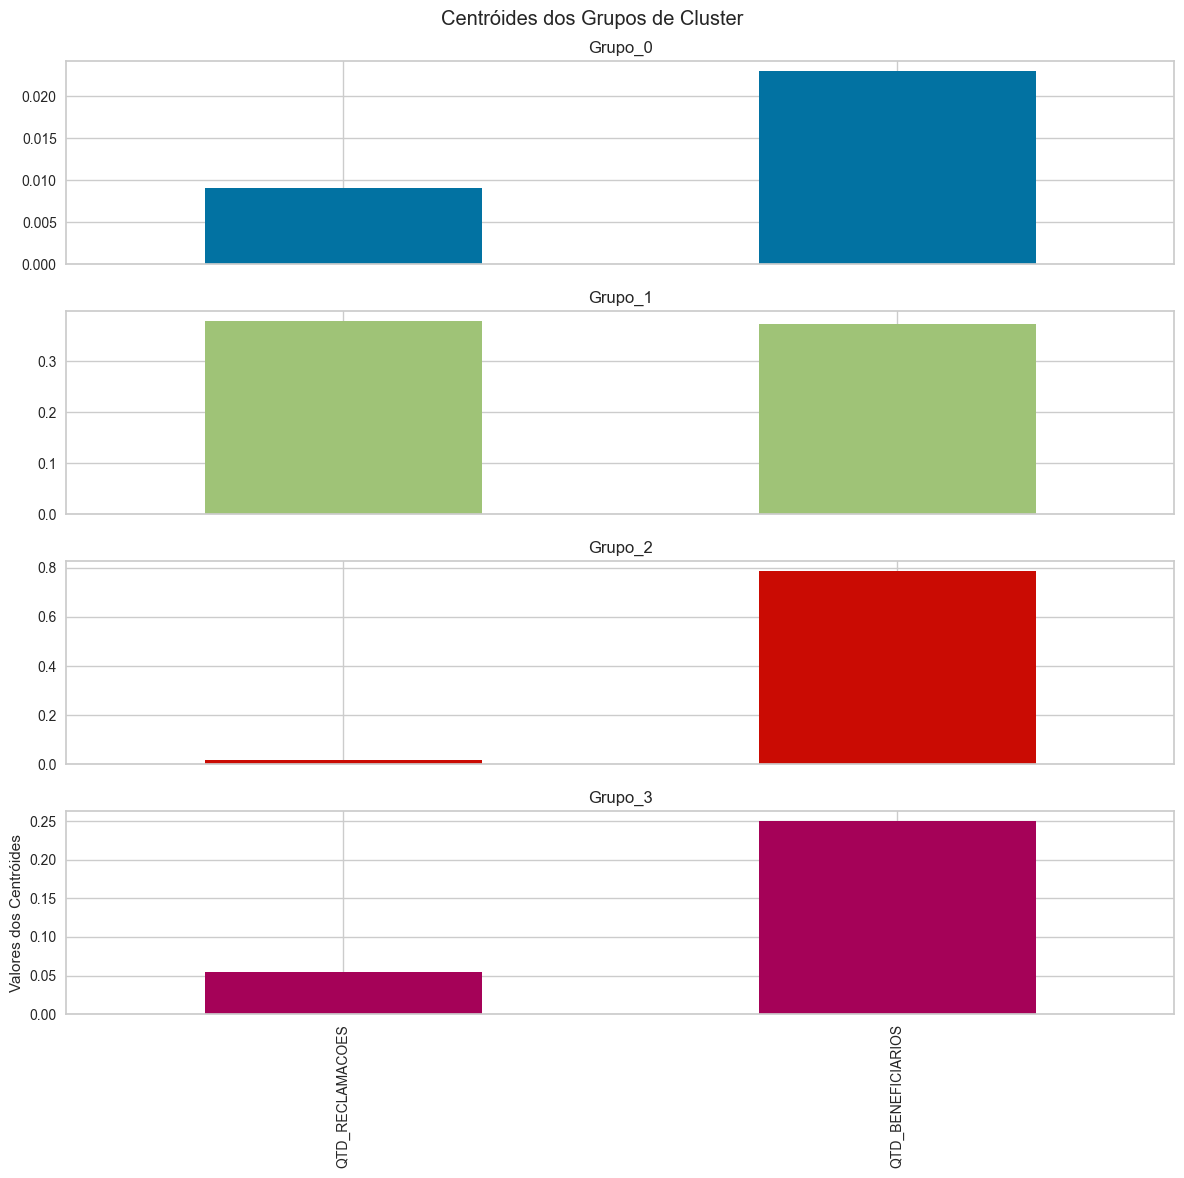

In [ ]:
# Seleciona apenas as colunas que foram usadas para o clustering
variaveis_clustering = df_scaled.drop(columns=['Cluster'], errors='ignore').columns

# Cria um  com os centróides, usando as colunas das variáveis de clustering
centroid_df = pd.DataFrame(centroids, columns=variaveis_clustering).T.add_prefix('Grupo_')

# Plota o gráfico
centroid_df.plot.bar(subplots=True, figsize=(12, 12), legend=False)
plt.suptitle('Centróides dos Grupos de Cluster')
plt.ylabel('Valores dos Centróides')
plt.tight_layout()
plt.show()


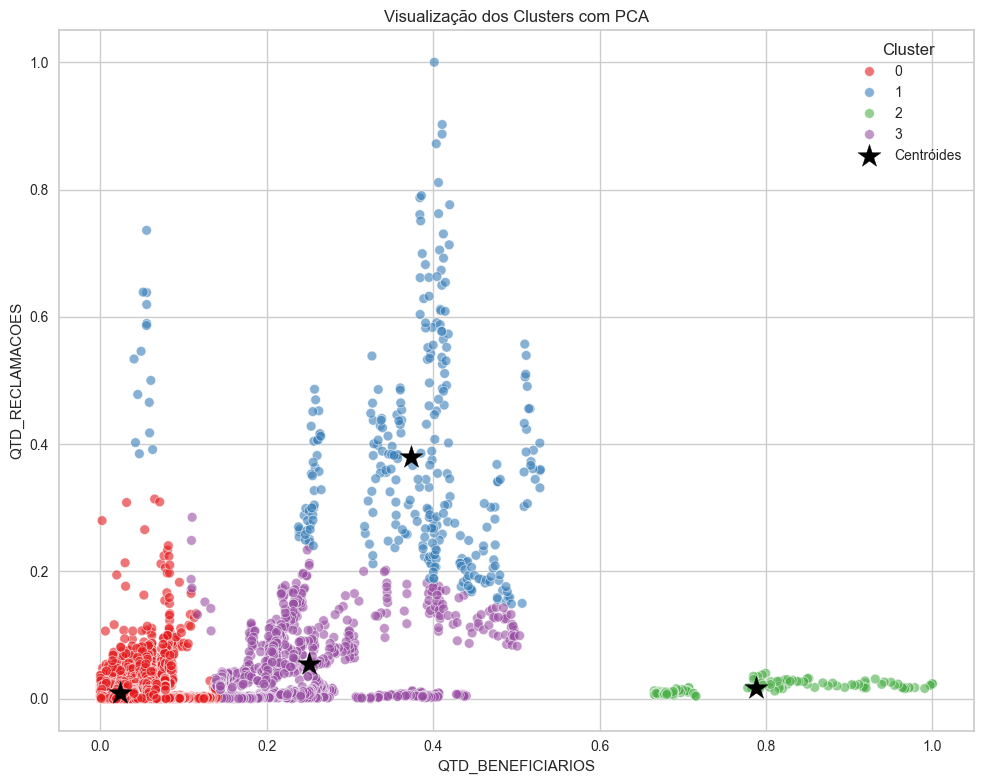

In [ ]:
# Configuração do gráfico de clusters
grafico_cluster = plt.figure(figsize=(10, 8))

# Gráfico de dispersão dos dados com clusters (eixos invertidos)
sns.scatterplot(data=df_scaled, x='QTD_BENEFICIARIOS', y='QTD_RECLAMACOES', 
                palette='Set1', hue='Cluster', alpha=0.6)

# Exibição dos centróides (eixos invertidos)
plt.scatter(centroids[:, 1], centroids[:, 0], s=300, c='black', marker='*', label='Centróides')

# Títulos e legendas
plt.title('Visualização dos Clusters com PCA')
plt.xlabel('QTD_BENEFICIARIOS')
plt.ylabel('QTD_RECLAMACOES')
plt.legend(title='Cluster')
plt.tight_layout()
plt.show()


In [404]:
df.assign(cluster=labels).groupby('cluster').agg(['mean','min','max','median'])

QTD_RECLAMACOES                    QTD_BENEFICIARIOS           \
                   mean  min   max  median              mean      min   
cluster                                                                 
0             47.615193    1  1611    18.0      2.815100e+05   100005   
1           1946.973597  765  5132  1816.0      3.038571e+06   418896   
2             88.358974   21   207    84.0      6.304152e+06  5342228   
3            282.102825    1  1464   178.0      2.074723e+06   959065   

                             
             max     median  
cluster                      
0        1223372   203523.0  
1        4266265  3219100.0  
2        7977292  6324693.0  
3        4069282  1910201.0

In [405]:
df_3.head()

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,COMPETENCIA,COMPETENCIA_BENEFICIARIO
3,582,PORTO SEGURO - SEGURO SAÚDE S/A,assistencia medica,49.93,303,606829,Grande,202409,202408
4,582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,1.59,15,942240,Grande,202409,202408
5,701,UNIMED SEGUROS SAÚDE S/A,assistencia medica,57.40,476,829322,Grande,202409,202408
7,5711,BRADESCO SAÚDE S.A.,assistencia medica,99.10,3099,3127234,Grande,202409,202408
8,6246,SUL AMERICA COMPANHIA DE SEGURO SAÚDE,assistencia medica,97.49,2124,2178663,Grande,202409,202408


In [406]:
# Use o modelo que foi ajustado para obter os rótulos
df_scaled['Cluster'] = modelo.labels_

# Se você deseja adicionar ao DataFrame original df_3
df_3['Cluster'] = modelo.labels_[:len(df_3)]  # Certifique-se que o tamanho está correto


In [407]:
df_3[['REGISTRO_ANS', 'RAZAO_SOCIAL', 'COBERTURA', 'IGR', 'QTD_RECLAMACOES',
       'QTD_BENEFICIARIOS', 'PORTE_OPERADORA', 'Cluster']]

,REGISTRO_ANS,RAZAO_SOCIAL,COBERTURA,IGR,QTD_RECLAMACOES,QTD_BENEFICIARIOS,PORTE_OPERADORA,Cluster
3,582,PORTO SEGURO - SEGURO SAÚDE S/A,assistencia medica,49.93,303,606829,Grande,0
4,582,PORTO SEGURO - SEGURO SAÚDE S/A,Exclusivamente odontológica,1.59,15,942240,Grande,0
5,701,UNIMED SEGUROS SAÚDE S/A,assistencia medica,57.40,476,829322,Grande,0
7,5711,BRADESCO SAÚDE S.A.,assistencia medica,99.10,3099,3127234,Grande,1
8,6246,SUL AMERICA COMPANHIA DE SEGURO SAÚDE,assistencia medica,97.49,2124,2178663,Grande,1
...,...,...,...,...,...,...,...,...
132412,416428,SUL AMÉRICA SERVIÇOS DE SAÚDE S.A.,assistencia medica,6.90,16,232508,Grande,0
132436,416801,UNIMED SAÚDE E ODONTO S.A,Exclusivamente odontológica,0.40,1,250512,Grande,0
132473,417815,SUL AMÉRICA ODONTOLÓGICO S/A,Exclusivamente odontológica,0.40,1,252483,Grande,0
132482,418021,ASSOCIAÇÃO SANTA SAÚDE,assistencia medica,2.80,3,108741,Grande,0


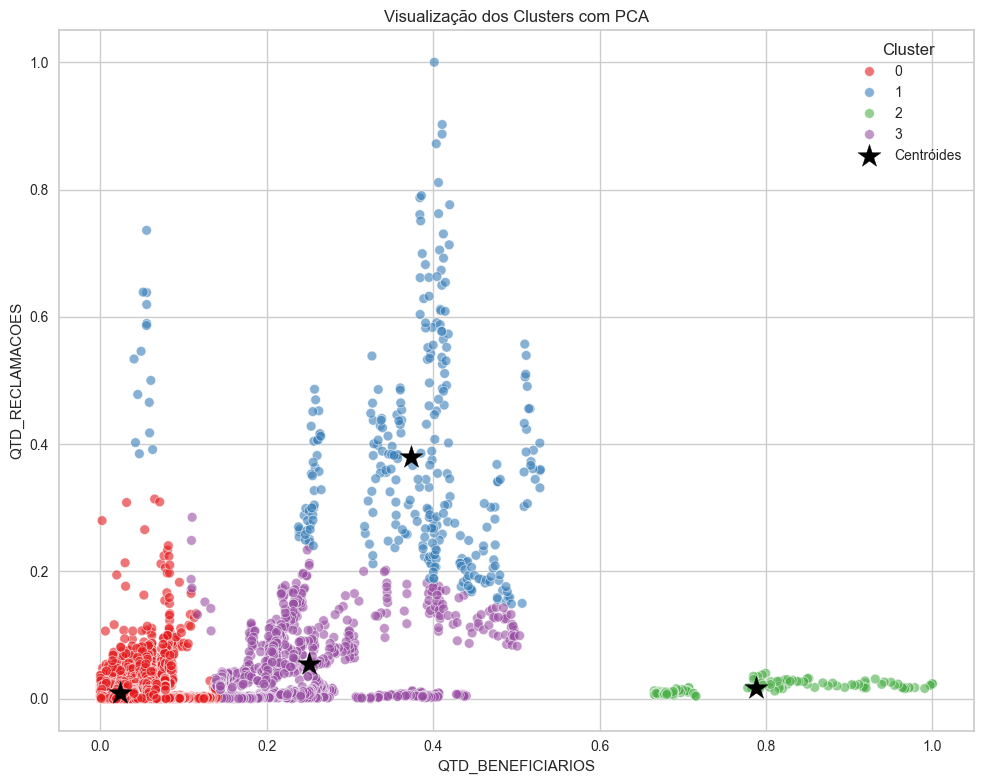

In [408]:
grafico_cluster

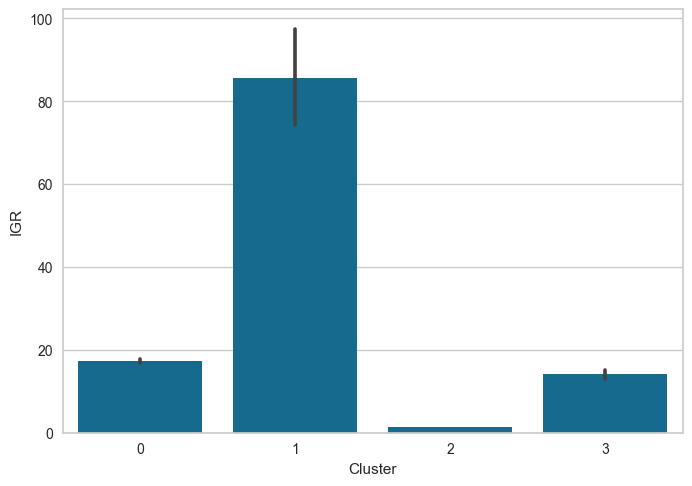

In [ ]:
sns.barplot(data= df_3, x = 'Cluster' ,  y='IGR')

